# Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# DataFrame importation

In [2]:
df = pd.read_csv("data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Data Preprocessing: Drop irrelevant columns

In [3]:
data_clean = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])
data_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


# Feature and Target Definition

In [4]:
X = data_clean.drop(columns=['price'])
y = data_clean['price']

In [5]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [6]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

# Standardize the features (Scaling)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled

array([[-0.44112227, -0.84320364, -0.82997105, ..., -0.67246372,
        -0.53101376,  1.22167046],
       [ 1.75970468,  0.43280154,  1.56852826, ..., -0.06912828,
        -1.67469295, -0.82569345],
       [-0.44112227, -0.20520105, -0.21736733, ..., -0.67246372,
        -0.1609999 , -0.82569345],
       ...,
       [-0.44112227,  0.43280154,  0.90400897, ..., -0.67246372,
         1.2854179 , -0.82569345],
       [ 0.6592912 , -0.20520105, -0.05123751, ...,  1.5254011 ,
         0.10810108, -0.82569345],
       [-0.44112227,  0.43280154, -0.67422434, ..., -0.67246372,
         0.64630305, -0.82569345]], shape=(4600, 12))

# Split the data into training and testing sets (80% train, 20% test)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
X_train

array([[ 0.6592912 ,  0.43280154,  0.65481424, ..., -0.67246372,
         0.61266543, -0.82569345],
       [ 0.6592912 ,  1.07080413,  1.64121006, ..., -0.67246372,
         0.67994068, -0.82569345],
       [ 0.6592912 ,  0.43280154,  0.6963467 , ..., -0.67246372,
         0.37720207, -0.82569345],
       ...,
       [-0.44112227, -1.48120623, -1.02725022, ..., -0.32770061,
        -1.30467909,  1.17367739],
       [-1.54153575, -1.48120623, -1.27644495, ..., -0.67246372,
        -2.38108303,  1.22167046],
       [-1.54153575, -1.48120623, -0.67422434, ...,  0.68504102,
        -1.40559196, -0.82569345]], shape=(3680, 12))

In [11]:
y_train

1898    6.850000e+05
1370    8.570000e+05
3038    6.750000e+05
2361    1.485000e+06
156     5.610000e+05
            ...     
4426    2.825089e+05
466     8.750000e+05
3092    2.900000e+05
3772    6.000000e+05
860     4.750000e+05
Name: price, Length: 3680, dtype: float64

In [12]:
X_test

array([[-0.44112227,  0.43280154, -0.70537368, ..., -0.06912828,
         1.21814265, -0.82569345],
       [ 1.75970468,  0.11380024, -0.14468553, ...,  0.83587488,
         0.51175256, -0.82569345],
       [-0.44112227,  1.38980543,  0.83132718, ...,  0.40492099,
         0.24265158,  1.21656481],
       ...,
       [-0.44112227, -0.20520105, -0.99610087, ..., -0.67246372,
         0.7135783 , -0.82569345],
       [ 0.6592912 ,  0.43280154,  0.23948968, ..., -0.67246372,
        -0.1609999 , -0.82569345],
       [ 0.6592912 ,  0.11380024,  0.12527543, ..., -0.67246372,
         0.44447732, -0.82569345]], shape=(920, 12))

In [13]:
y_test

3683      544000.0
4411           0.0
2584     1712500.0
69        365000.0
1844      275000.0
           ...    
1612      750000.0
1068      230000.0
4350    26590000.0
3027      687000.0
3455      289659.0
Name: price, Length: 920, dtype: float64

# Initialize the models: Linear Regression and Decision Tree

In [14]:
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the models

In [15]:
decision_tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [16]:
linear_reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Make predictions on the test set

In [17]:
y_pred_lr = linear_reg_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

In [18]:
y_pred_lr

array([ 304863.38578065,  326517.0699151 , 1071762.53630094,
        546241.40097353,  379799.98321085,  605792.93622745,
        481263.57120648,  418905.11058134,  509341.50791918,
        530852.97588253,  682958.97641212,  414525.36130053,
        836974.40259898,  416500.85730815,  367263.4338822 ,
        702908.51672189,  677878.69067825,  515539.32998879,
       1019380.63891384,  861119.79490708, 1364866.21814691,
        637439.7001677 ,  634739.56666331,  470424.21250262,
        162037.15383034,  232831.37648238,  669951.05071599,
        884080.66694997,  263027.225772  ,  974954.6422947 ,
       1883342.16391314,  481510.29664856, 1275554.65253717,
        430994.93178865,  180366.40705418,  339240.1735742 ,
        792335.74094013, 1011053.14613386,  238036.20927671,
        543438.66040776,  423414.50597293,  243429.92107968,
        390151.30074032,  361322.67375673,  320343.34636012,
        317865.29287641,  469559.6064662 ,  573249.20158969,
        828966.75691609,

In [19]:
y_pred_dt

array([ 337000.      ,  312000.      , 1411600.      ,  237227.857143,
        261000.      ,  735000.      ,  555000.      ,  268500.      ,
        280927.      ,  850000.      ,  789500.      ,  212700.      ,
       1256500.      ,  299000.      ,  263000.      ,  542500.      ,
        625000.      ,  695000.      ,  578000.      ,  838000.      ,
        400000.      ,  825500.      ,  566000.      ,  464900.      ,
        321950.      ,  279000.      ,  675000.      , 1256500.      ,
        419000.      ,  695000.      ,  195000.      ,  335000.      ,
       2321000.      ,  235000.      ,  452000.      ,  295000.      ,
        788600.      ,  550000.      ,  210000.      ,  433500.      ,
        645000.      ,  245000.      ,  375000.      ,  554000.      ,
        465750.      ,  650000.      ,  250000.      ,  525000.      ,
             0.      ,  548800.      , 1555000.      ,  382000.      ,
        437500.      ,  411000.      ,  139000.      ,  266066.666667,
      

# Evaluate and compare model performance

In [20]:
# Linear Regression Performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [21]:
# Decision Tree Performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Display performance metrics

In [22]:
print("Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R²): {r2_lr}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 986921767056.1313
R-squared (R²): 0.03228385663277078


In [23]:
print("\nDecision Tree Model Performance:")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R-squared (R²): {r2_dt}")


Decision Tree Model Performance:
Mean Squared Error (MSE): 1052062628471.206
R-squared (R²): -0.031589355295920996


# Select the best-performing model

In [24]:

best_model = linear_reg_model if r2_lr > r2_dt else decision_tree_model
print("\nBest Performing Model:", "Linear Regression" if best_model == linear_reg_model else "Decision Tree")


Best Performing Model: Linear Regression


# Saving the best-performing model

In [25]:
joblib.dump(best_model, 'best_house_price_model.pkl')


['best_house_price_model.pkl']

In [28]:
# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Visualization: Compare Model Predictions vs Actual Values

# Linear Regression Predictions vs Actual

Text(0, 0.5, 'Predicted Price')

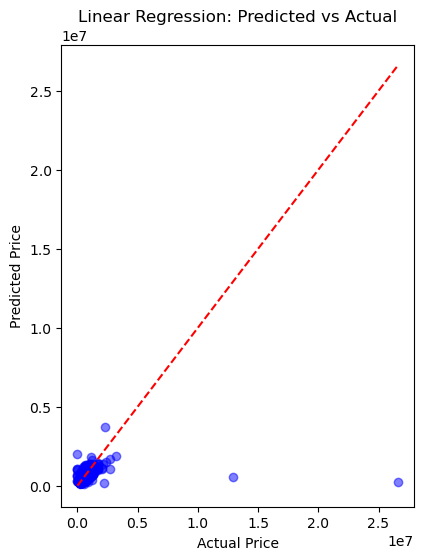

In [26]:

plt.figure(figsize=(10, 6))

# Linear Regression Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Decision Tree Predictions vs Actual

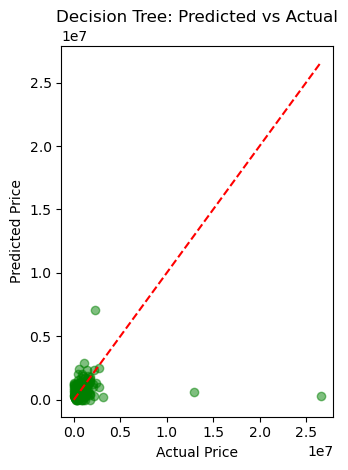

In [27]:
# Decision Tree Predictions vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()